<a href="https://colab.research.google.com/github/callezenwaka/machine-learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate Data

In [1]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# define seed & sample size
SEED = 1234
NUM_SAMPLES = 50

In [3]:
# set seed for reproducibility
np.random.seed(SEED)

In [5]:
# generate synthetic data
def generate_data(num_samples):
  """Generate dummy data for linear regression."""
  X = np.array(range(num_samples))
  random_noise = np.random.uniform(-10,20, size=num_samples)
  y = 3.5*X + random_noise # add some noise
  return X, y

In [7]:
# generate random (linear) data
X, y = generate_data(num_samples=NUM_SAMPLES)
data = np.vstack([X, y]).T
print(data[:5])

[[ 0.         -4.25441649]
 [ 1.         12.16326313]
 [ 2.         10.13183217]
 [ 3.         24.06075751]
 [ 4.         27.39927424]]


In [8]:
# load into a pandas dataframe
df = pd.DataFrame(data, columns=['X', 'y'])
X = df[['X']].values
y = df[['y']].values
df.head()

,X,y
0,0.0,-4.254416
1,1.0,12.163263
2,2.0,10.131832
3,3.0,24.060758
4,4.0,27.399274


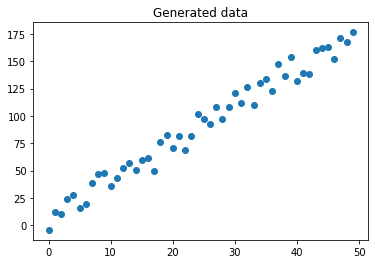

In [9]:
# scatter plot
plt.title("Generated data")
plt.scatter(x=df['X'], y=df['y'])
plt.show()

# Linear Reg. with Numpy

# Split Data

In [10]:
# split percentages
TRAIN_SIZE =0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [12]:
# shuffle data. P.S - never shuffle X & y differently to avoid mismatch
indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [15]:
# split indices
train_start = 0
train_end = int(0.7*NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE+VAL_SIZE)*NUM_SAMPLES)
test_start = val_end

In [16]:
# split dataset
X_train = X[train_start:train_end]
y_train = y[train_start:train_end]
X_val = X[val_start:val_end]
y_val = y[val_start:val_end]
X_test = X[test_start:]
y_test = y[test_start:]
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (35, 1), y_train: (35, 1)
X_val: (7, 1), y_val: (7, 1)
X_test: (8, 1), y_test: (8, 1)


# Standardize Dataset

In [18]:
# standardize data function
def standardize_data(data, mean, std):
  """Standardize dataset to zero mean & unit variance."""
  return (data - mean)/std

In [19]:
# determine means and stds
X_mean = np.mean(X_train)
x_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

We need to treat the validation and test sets as if they were hidden datasets. So we only use the train set to determine the mean and std to avoid biasing our training process.

In [ ]:
# standardize data